In [35]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import sem

In [4]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
faces.images.shape

(400, 64, 64)

In [6]:
faces.data.shape

(400, 4096)

In [7]:
faces.target.shape

(400,)

In [12]:
np.min(faces.data), np.max(faces.data), np.mean(faces.data)

(0.0, 1.0, 0.5470426)

In [13]:
def print_faces(images, target, top_n):
    # Set up the figure size in inches.
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # Plot the images in a matrix of 20x20.
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # Label the image with the target value.
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

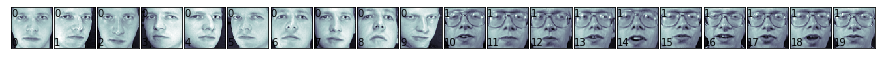

In [14]:
print_faces(faces.images, faces.target, 20)

In [18]:
# The kernel function is like a similarity measure between instances.
# The default kernel is rbf, which allows us to model nonlinear problems.
svc_1 = SVC(kernel='linear') # Start with the simplest kernel, the linear kernel.

In [32]:
def evaluate_cross_validation(clf, X, y, k=5):
    # Create a k-fold cross validation iterator.
    cv = KFold(k, shuffle=True, random_state=0)
    
    # By default, the score used is the one returned by score method
    # of the estimator(accuracy).
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    return f'Mean score: {np.mean(scores):.3f} (+/-{sem(scores):.3f}))'

In [33]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, 
                                                    faces.target,
                                                    test_size=0.25,
                                                    random_state=0)

In [34]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]


'Mean score: 0.913 (+/-0.012))'

## Inference

Cross validation with five folds obtains pretty good results (accuracy of 0.91).

In [37]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    
    print('Accuracy on training set:')
    print(clf.score(X_train, y_train))
    
    print('Accuracy on testing set:')
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print('Classification report:')
    print(metrics.classification_report(y_test, y_pred))

    print('Confusion matrix:')
    print(metrics.confusion_matrix(y_test, y_pred))

In [38]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         